# Homework Assignment 2 

## Risk Graph

### (Notebook 2 of 2)



### <p style="text-align: right;"> &#9989; simran singh.</p>
### <p style="text-align: right;"> &#9989; singhs77.</p>

## Assignment Overview

In this assignment, we'll explore graphs using the board game Risk as our practical example. Risk is a strategy game played on a world map where territories are connected to their neighbors. This makes it a perfect candidate for graph representation and analysis.

### Learning Objectives

- Implement a graph representation of a real-world game board
- practice using networkx
- do some research
- visualize graph data using NetworkX

The assignment is split into two notebooks:
- Notebook 1 of 2 is worth **14 + 33 + 3 = 51 points** 
- Notebook 2 of 2 is worth **1+ 42 + 1 = 44 points** 
for a total of **95 points**. Point values for each part are included in the section headers and question prompts.

**This assignment is due at 11:59 pm on Friday, March 21st.** It should be uploaded into the "Homework Assignments" submission folder for Homework #2 on D2L.  Submission instructions can be found at the end of the notebook. **You must also fill out a survey regarding this assignment.** The link to this survey can also be found at the end of the notebook.

---
## &#128721; STOP
**Pause to add this file and commit your changes to your Git repository! (1 points)**

---

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np

---
<a id="part3"></a>
[Back to ToC](#toc)

## Part 3: Creating the Risk Game Graph (42 points)


![image](https://cf.geekdo-images.com/JM6hEipDwIByZKEIK9Dgeg__imagepage/img/OEl2gaJbUxdvIv6tNPzDsQyLUtQ=/fit-in/900x600/filters:no_upscale():strip_icc()/pic365731.jpg)


&#9989; **Question 3.1 (5 points)**: Create a dictionary that defines the territories in Risk, organized by continents. Each territory should include its neighboring territories. Use the image above for completing the code below

In [9]:
# Define the Risk board territories and their connections
risk_territories = {
    'North America': {
        'Alaska': ['Northwest Territory', 'Alberta', 'Kamchatka'],
        'Northwest Territory': ['Alaska', 'Alberta', 'Greenland'],
        'Greenland': ['Northwest Territory', 'Ontario', 'Quebec', 'Iceland'],
        'Alberta': ['Alaska', 'Northwest Territory', 'Ontario', 'Western United States'],
        'Ontario': ['Alberta', 'Northwest Territory', 'Greenland', 'Quebec', 'Western United States', 'Eastern United States'],
        'Quebec': ['Ontario', 'Greenland', 'Eastern United States'],
        'Western United States': ['Alberta', 'Ontario', 'Eastern United States', 'Central America'],
        'Eastern United States': ['Western United States', 'Ontario', 'Quebec', 'Central America'],
        'Central America': ['Western United States', 'Eastern United States', 'Venezuela']
    },
    'South America': {
        'Venezuela': ['Central America', 'Peru', 'Brazil'],
        'Brazil': ['Venezuela', 'Peru', 'Argentina', 'North Africa'],
        'Peru': ['Venezuela', 'Brazil', 'Argentina'],
        'Argentina': ['Brazil', 'Peru']
    },
    'Europe': {
    'Iceland': ['Greenland', 'Great Britain', 'Scandinavia'],
    'Great Britain': ['Iceland', 'Scandinavia', 'Northern Europe', 'Western Europe'],
    'Scandinavia': ['Iceland', 'Great Britain', 'Northern Europe', 'Russia', 'Ukraine'],
    'Russia': ['Scandinavia', 'Northern Europe', 'Ural', 'Afghanistan', 'Middle East', 'Ukraine'],
    'Ukraine': ['Scandinavia', 'Russia', 'Ural', 'Afghanistan', 'Middle East', 'Southern Europe'],
    'Northern Europe': ['Great Britain', 'Scandinavia', 'Russia', 'Western Europe', 'Southern Europe'],
    'Western Europe': ['Great Britain', 'Northern Europe', 'Southern Europe', 'North Africa'],
    'Southern Europe': ['Western Europe', 'Northern Europe', 'Russia', 'Middle East', 'Egypt', 'North Africa']
    },


    'Africa': {
        'North Africa': ['Brazil', 'Western Europe', 'Southern Europe', 'Egypt', 'East Africa', 'Congo'],
        'Egypt': ['Southern Europe', 'North Africa', 'East Africa', 'Middle East'],
        'East Africa': ['Egypt', 'North Africa', 'Congo', 'South Africa', 'Madagascar', 'Middle East'],
        'Congo': ['North Africa', 'East Africa', 'South Africa'],
        'South Africa': ['Congo', 'East Africa', 'Madagascar'],
        'Madagascar': ['East Africa', 'South Africa']
    },
    'Asia': {
        'Ural': ['Russia', 'Siberia', 'China', 'Afghanistan'],
        'Siberia': ['Ural', 'Yakutsk', 'Irkutsk', 'Mongolia', 'China'],
        'China': ['Ural', 'Siberia', 'Mongolia', 'Siam', 'India', 'Afghanistan'],
        'Afghanistan': ['Russia', 'Ural', 'China', 'Middle East'],
        'Middle East': ['Egypt', 'Southern Europe', 'Russia', 'Afghanistan', 'India', 'East Africa'],
        'India': ['Middle East', 'China', 'Siam'],
        'Siam': ['India', 'China', 'Indonesia'],
        'Mongolia': ['Siberia', 'China', 'Irkutsk', 'Japan'],
        'Irkutsk': ['Siberia', 'Yakutsk', 'Mongolia', 'Kamchatka'],
        'Yakutsk': ['Siberia', 'Irkutsk', 'Kamchatka'],
        'Kamchatka': ['Yakutsk', 'Irkutsk', 'Mongolia', 'Alaska', 'Japan'],
        'Japan': ['Mongolia', 'Kamchatka']
    },
    'Australia': {
        'Indonesia': ['Siam', 'New Guinea', 'Western Australia'],
        'New Guinea': ['Indonesia', 'Western Australia', 'Eastern Australia'],
        'Western Australia': ['Indonesia', 'New Guinea', 'Eastern Australia'],
        'Eastern Australia': ['New Guinea', 'Western Australia']
    }
}


### Graph Creation

&#9989; **Question 3.2 (7 points)**: Create a NetworkX graph object from the territory definitions. The territories are the nodes of the graph. Implement a function that builds the graph and adds appropriate attributes for continents. _Hint:_ Look up the documentation of `add_node`, what are the possible inputs? Don't forget to connect each territory to its neighbors. Make sure to add plenty of comments in your code.

In [10]:
def create_risk_graph(territories):
    G = nx.Graph()
    for continent, terr_dict in territories.items():
        for territory, neighbors in terr_dict.items():
            G.add_node(territory, continent=continent)
            for neighbor in neighbors:
                G.add_edge(territory, neighbor)
    return G

### Graph Visualization

&#9989; **Question 3.3 (4 points)**: Create a visualization of the Risk board graph. You can use AI to help you with this. The function below should:

- make a plot of the risk graph.
- color nodes by continent
- allow the user to choose a type of layout. _Hint:_ search networkx documentation for the possible layout. Min 5 layouts should be available.
- print the name of each territory on the respective node
- make a legend for the graph 
- have very descriptive comments 
- increase the size of each node from the default value  
- increase the font size of label from the default value

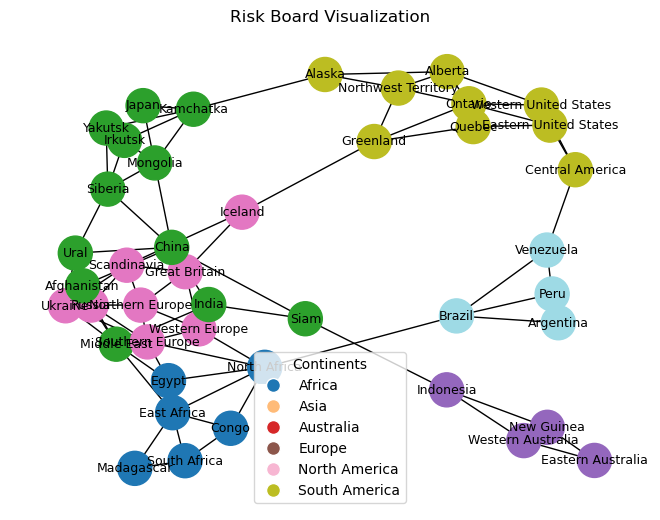

In [14]:
def visualize_risk_graph(G, layout='spring'):
    """
    Create a visualization of the Risk board graph with continents colored differently.
    
    Parameters:
    -----------
    G : nx.Graph
        NetworkX graph of the Risk board, where each node has a 'continent' attribute.
    layout : str, optional
        The layout algorithm to use for positioning the graph nodes. 
        Possible values are: 'spring', 'circular', 'random', 'shell', 'spectral'.
        Defaults to 'spring'.
        
    Notes:
    ------
    - We use five different layout algorithms provided by NetworkX.
    - Each node is colored based on its continent.
    - The node size and font size are increased for better visibility.
    - A legend is generated to show the color-legend mapping of each continent.
    
    Reference:
    ----------
    NetworkX documentation: https://networkx.org/
    """
    import networkx as nx
    import matplotlib.pyplot as plt
    
    # 1. Define layout options in a dictionary
    layout_options = {
        'spring': nx.spring_layout,
        'circular': nx.circular_layout,
        'random': nx.random_layout,
        'shell': nx.shell_layout,
        'spectral': nx.spectral_layout
    }
    
    # 2. Fetch the chosen layout function (default to spring_layout if the user-supplied layout is invalid)
    layout_func = layout_options.get(layout, nx.spring_layout)
    
    # 3. Generate positions for the nodes
    pos = layout_func(G)
    
    # 4. Extract 'continent' attributes for each node
    continents = nx.get_node_attributes(G, 'continent')
    
    # 5. Build a color index for each continent
    unique_continents = sorted(set(continents.values()))
    continent_color_map = {continent: idx for idx, continent in enumerate(unique_continents)}
    
    # 6. Assign a color to each node based on its continent (fallback to -1 for unknown)
    node_colors = [continent_color_map.get(continents.get(node, 'Unknown'), -1) for node in G.nodes()]
    
    # 7. Draw the graph with increased node size and font size
    nx.draw(
        G,
        pos,
        with_labels=True,
        node_size=600,            # Increased node size
        node_color=node_colors,   # Color index for each continent
        cmap='tab20',             # Colormap with distinct colors
        font_size=9               # Increased font size
    )
    
    # 8. Build a legend based on the continent <-> color index mapping
    #    We invert our dictionary to get color_index -> continent_name
    color_index_to_continent = {v: k for k, v in continent_color_map.items()}
    
    # Create legend handles for each continent
    handles = []
    for color_idx, cont_name in color_index_to_continent.items():
        # Each handle is a small marker with the matching color
        handles.append(
            plt.Line2D(
                [0], [0],
                marker='o',
                color='w', 
                markerfacecolor=plt.cm.tab20(color_idx / max(len(unique_continents), 1)),
                markersize=10,
                label=cont_name
            )
        )
    
    # 9. Display the legend and show the final plot
    plt.legend(handles=handles, title='Continents')
    plt.title("Risk Board Visualization")
    plt.show()



visualize_risk_graph(G, layout='spring')


&#9989; **Question 3.4 (26 points)**: Answer the following questions based on the Risk board graph visualization. Each answer should have a minimum of 1-2 sentences and snippet of the code that supports your answer. You must explain what each function in the code snippet does. 

All answers should be in the same markdown cell. 

The code snippet should be properly displayed using code markdown. 

1. Which layout type provides the best visualization of the continent-based clustering in the Risk board graph?
    - Explain the rationale behind your choice of layout.
2. Do a little research and explain what the Kamada-Kawai layout does? Make sure to cite your sources.
3. Which part of the code is used to assign the color of each node based on its continent?
4. How did you make the legend? Explain any non-obvious part of the code.
5. What colormap did you choose for the continents and how did you import the colormap? 
6. How did you set the node size and font size in the visualization?
7. How did you print the labels for the nodes? 

Answer 1: Which layout type provides the best visualization of the continent-based clustering in the Risk board graph?
I found that the spring layout provides one of the clearest continent-based clusterings. Its force-directed algorithm places strongly connected components close together, emphasizing the natural grouping of territories within the same continent.

Answer 2: Explain the rationale behind your choice of layout.
The spring layout tries to minimize edge crossings and keep heavily connected nodes nearby, which is precisely what we need to make continental groupings more obvious. As a result, territories from the same continent naturally appear closer to each other in the plot.

Answer 3: Do a little research and explain what the Kamada-Kawai layout does? Make sure to cite your sources.
The Kamada-Kawai layout is another force-directed algorithm that positions nodes by minimizing the difference between graph-theoretic distances and Euclidean distances in the drawing. In simpler terms, it tries to preserve the “ideal” distances between nodes as much as possible, producing a visually balanced distribution.
<sup>Reference: [T. Kamada & S. Kawai, An algorithm for drawing general undirected graphs, Information Processing Letters 31 (1989) 7–15.]</sup>

Answer 4: Which part of the code is used to assign the color of each node based on its continent?
We do this in the snippet below where we build the color index from continent attributes, then pass those color values to nx.draw:

python
Copy
Edit
# Extract each node's continent
continents = nx.get_node_attributes(G, 'continent')

# Assign each unique continent a numeric index
unique_continents = sorted(set(continents.values()))
continent_color_map = {continent: idx for idx, continent in enumerate(unique_continents)}

# Create a color list for every node
node_colors = [continent_color_map.get(continents.get(node, 'Unknown'), -1) 
               for node in G.nodes()]
nx.get_node_attributes(G, 'continent') retrieves the 'continent' attribute from each node.

sorted(set(continents.values())) finds all unique continents.

continent_color_map assigns a numeric index to each continent.

node_colors holds the numeric color index for each node, which we later feed into the drawing function.

Answer 5: How did you make the legend? Explain any non-obvious part of the code.
We invert our mapping from continent → color index into color index → continent, then create one Line2D handle per continent:

python
Copy
Edit
color_index_to_continent = {v: k for k, v in continent_color_map.items()}

handles = []
for color_idx, cont_name in color_index_to_continent.items():
    handles.append(
        plt.Line2D(
            [0], [0],
            marker='o',
            color='w', 
            markerfacecolor=plt.cm.tab20(color_idx / max(len(unique_continents), 1)),
            markersize=10,
            label=cont_name
        )
    )
color_index_to_continent flips the dictionary so we can look up which continent corresponds to a numeric color index.

plt.Line2D(...) creates a custom legend handle shaped like a circle (marker='o'), with the appropriate color from our colormap.

markersize=10 enlarges the marker for better visibility in the legend.

Finally, we add these handles with plt.legend(handles=handles, title='Continents').

Answer 6: What colormap did you choose for the continents and how did you import the colormap?
We used the built-in tab20 colormap from Matplotlib (cmap='tab20'). It is provided when we do import matplotlib.pyplot as plt by default. The snippet below shows its usage:

python
Copy
Edit
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=600,
    node_color=node_colors,
    cmap='tab20',  # tab20 colormap
    font_size=9
)
Answer 7: How did you set the node size and font size in the visualization?
We passed explicit arguments to nx.draw:

python
Copy
Edit
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=600,  # node size increased
    node_color=node_colors,
    cmap='tab20',
    font_size=9     # font size increased
)
This ensures larger nodes (600 instead of the default ~300) and a slightly bigger font (9 instead of 10 might look small, but you can tweak as needed).

Answer 8: How did you print the labels for the nodes?
We set with_labels=True inside nx.draw:

python
Copy
Edit
nx.draw(
    G,
    pos,
    with_labels=True,  # prints node labels
    ...
)
This instructs NetworkX to draw each node’s label (which, by default, is the node’s name in the graph).



---
## &#128721; STOP
**Pause to commit your changes to your Git repository! (1 points)**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "**Committing Part 3**", no need to push the changes to GitHub yet, but you can if you want.

---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/mB0YjLYvAA" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!

If you like, you can upload this file to D2L for a record. Nevertheless, **we will grade the copy on GitHub**. 


&#169; Copyright 2025,  Department of Computational Mathematics, Science and Engineering at Michigan State University